# Exploratory Analysis

### Notes for EDA/cleaning
- Focus on Remaining Lease Years. Lease Duration and Lease Start Year have unreliable values
- Price = Transacted Price/No. of Units [Some transactions have multiple units]

### Some context:
- Resale property is a completed property sold by an owner, while a subsale property involves the original buyer selling a unit before the project's completion or Temporary Occupation Permit (TOP), often to a different buyer



In [73]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import json
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
private_data = "../datasets/cleaned/cleaned_private.csv"

df = pd.read_csv(private_data, quotechar='"', escapechar='\\', thousands=',')

In [75]:
# remove outlier function
def removeoutlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    clean = series[~outliers]
    clean = pd.DataFrame(clean)
    return clean

## Uni-Variate Analysis

### House Price Distribution

In [76]:
# Summary statistics of Price 
pd.set_option('display.float_format', '{:,.4f}'.format)
unitprice = pd.DataFrame(df['Price'])
removeoutlier(unitprice).describe()


,Price
count,"118,326.0000"
mean,"1,652,538.4691"
std,"700,379.8847"
min,"320,000.0000"
25%,"1,153,800.0000"
50%,"1,497,000.0000"
75%,"1,995,672.0000"
max,"3,822,000.0000"


<Axes: ylabel='Density'>

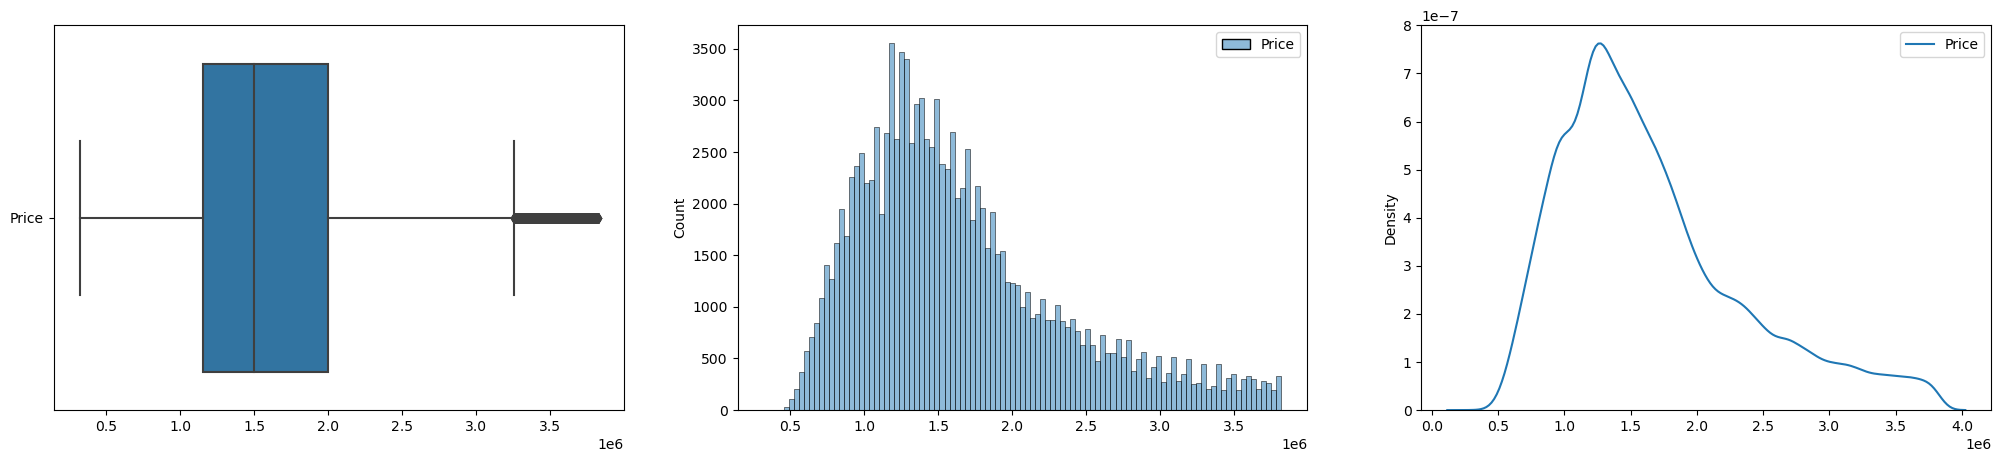

In [77]:
# Plot the basic uni-variate figures for Price  
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(unitprice), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(unitprice), ax = axes[1])
sb.kdeplot(data = removeoutlier(unitprice), ax = axes[2])

In [78]:
# Summary statistics of Price Per Square Foot 
psf = pd.DataFrame(df['Unit Price ($ PSF)'])
removeoutlier(unitprice).describe()

,Price
count,"118,326.0000"
mean,"1,652,538.4691"
std,"700,379.8847"
min,"320,000.0000"
25%,"1,153,800.0000"
50%,"1,497,000.0000"
75%,"1,995,672.0000"
max,"3,822,000.0000"


<Axes: ylabel='Density'>

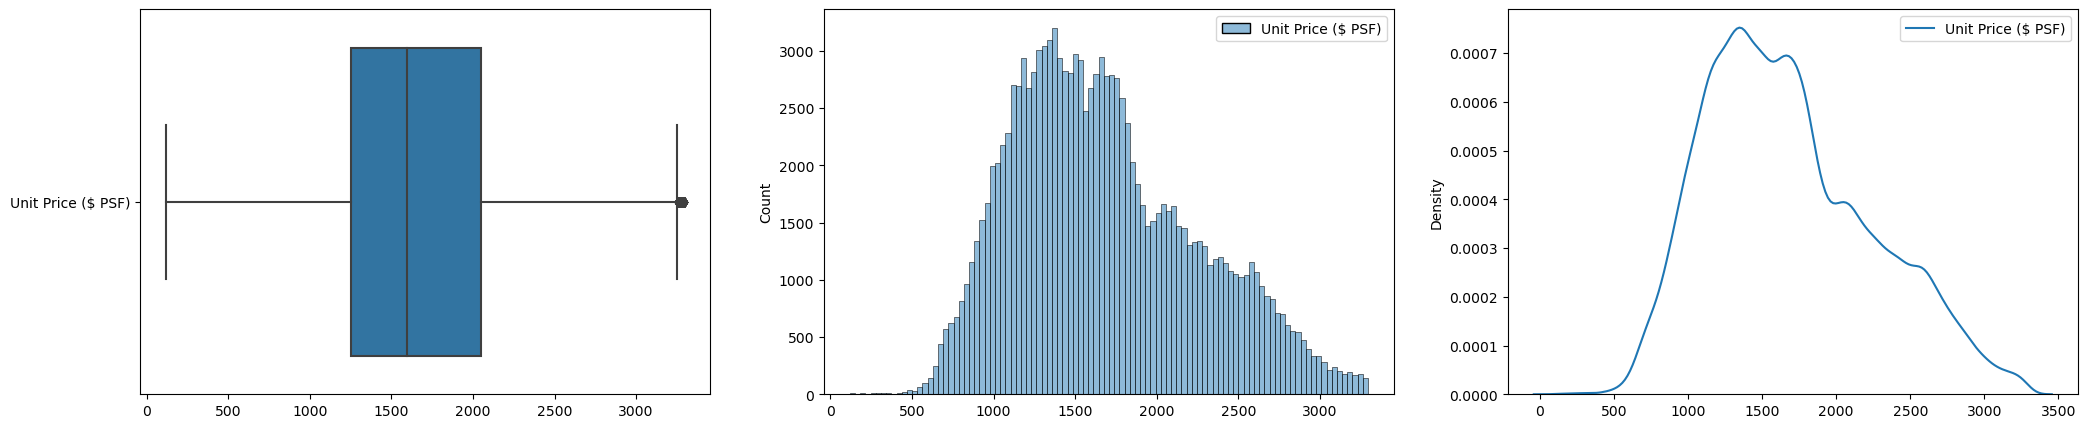

In [79]:
# Plot the basic uni-variate figures for Price Per Square Foot 
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(psf), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(psf), ax = axes[1])
sb.kdeplot(data = removeoutlier(psf), ax = axes[2])

### Numerical Data Analysis

In [80]:
# Extract relevant numeric variables
area = pd.DataFrame(df['Area (SQFT)'])

# Summary statistics of Price Per Square Foot 
removeoutlier(area).describe()

,Area (SQFT)
count,"118,193.0000"
mean,"1,023.4634"
std,385.8534
min,258.3400
25%,721.1900
50%,979.5200
75%,"1,248.6200"
max,"2,238.9100"


<Axes: ylabel='Density'>

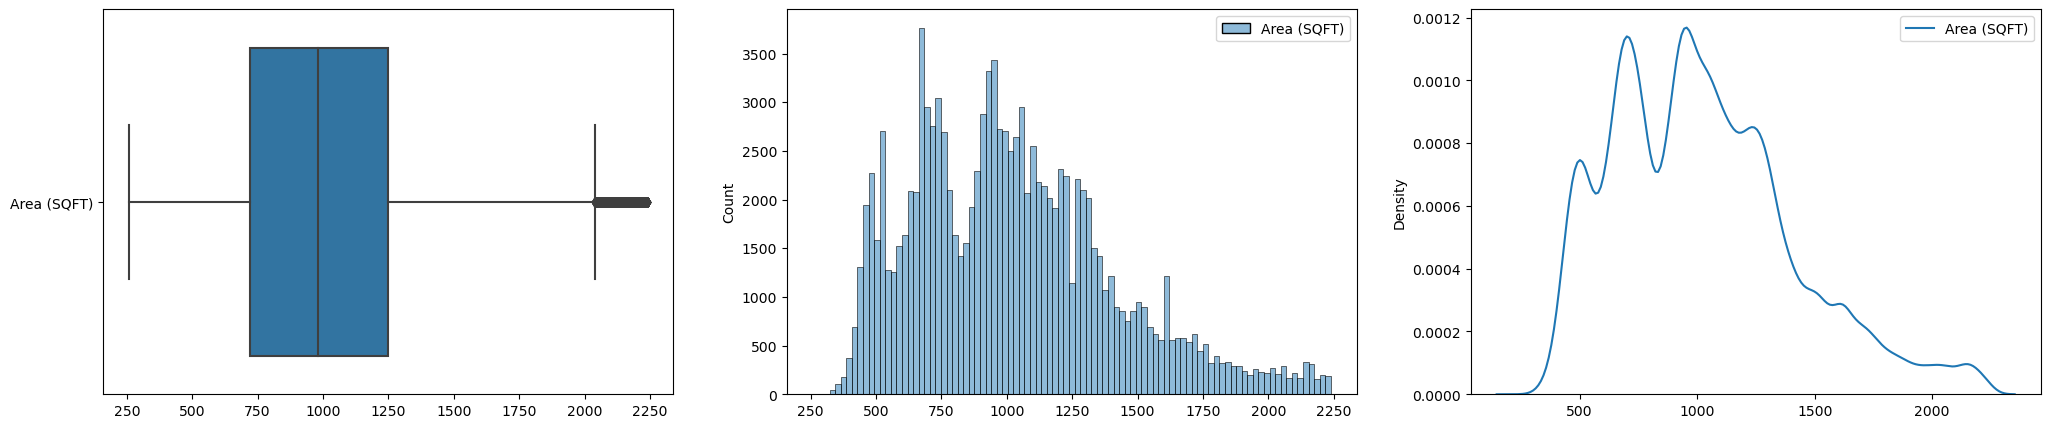

In [81]:
# Plot the basic uni-variate figures for Area (SQFT)
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(area), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(area), ax = axes[1])
sb.kdeplot(data = removeoutlier(area), ax = axes[2])

### Categorical Data Analysis

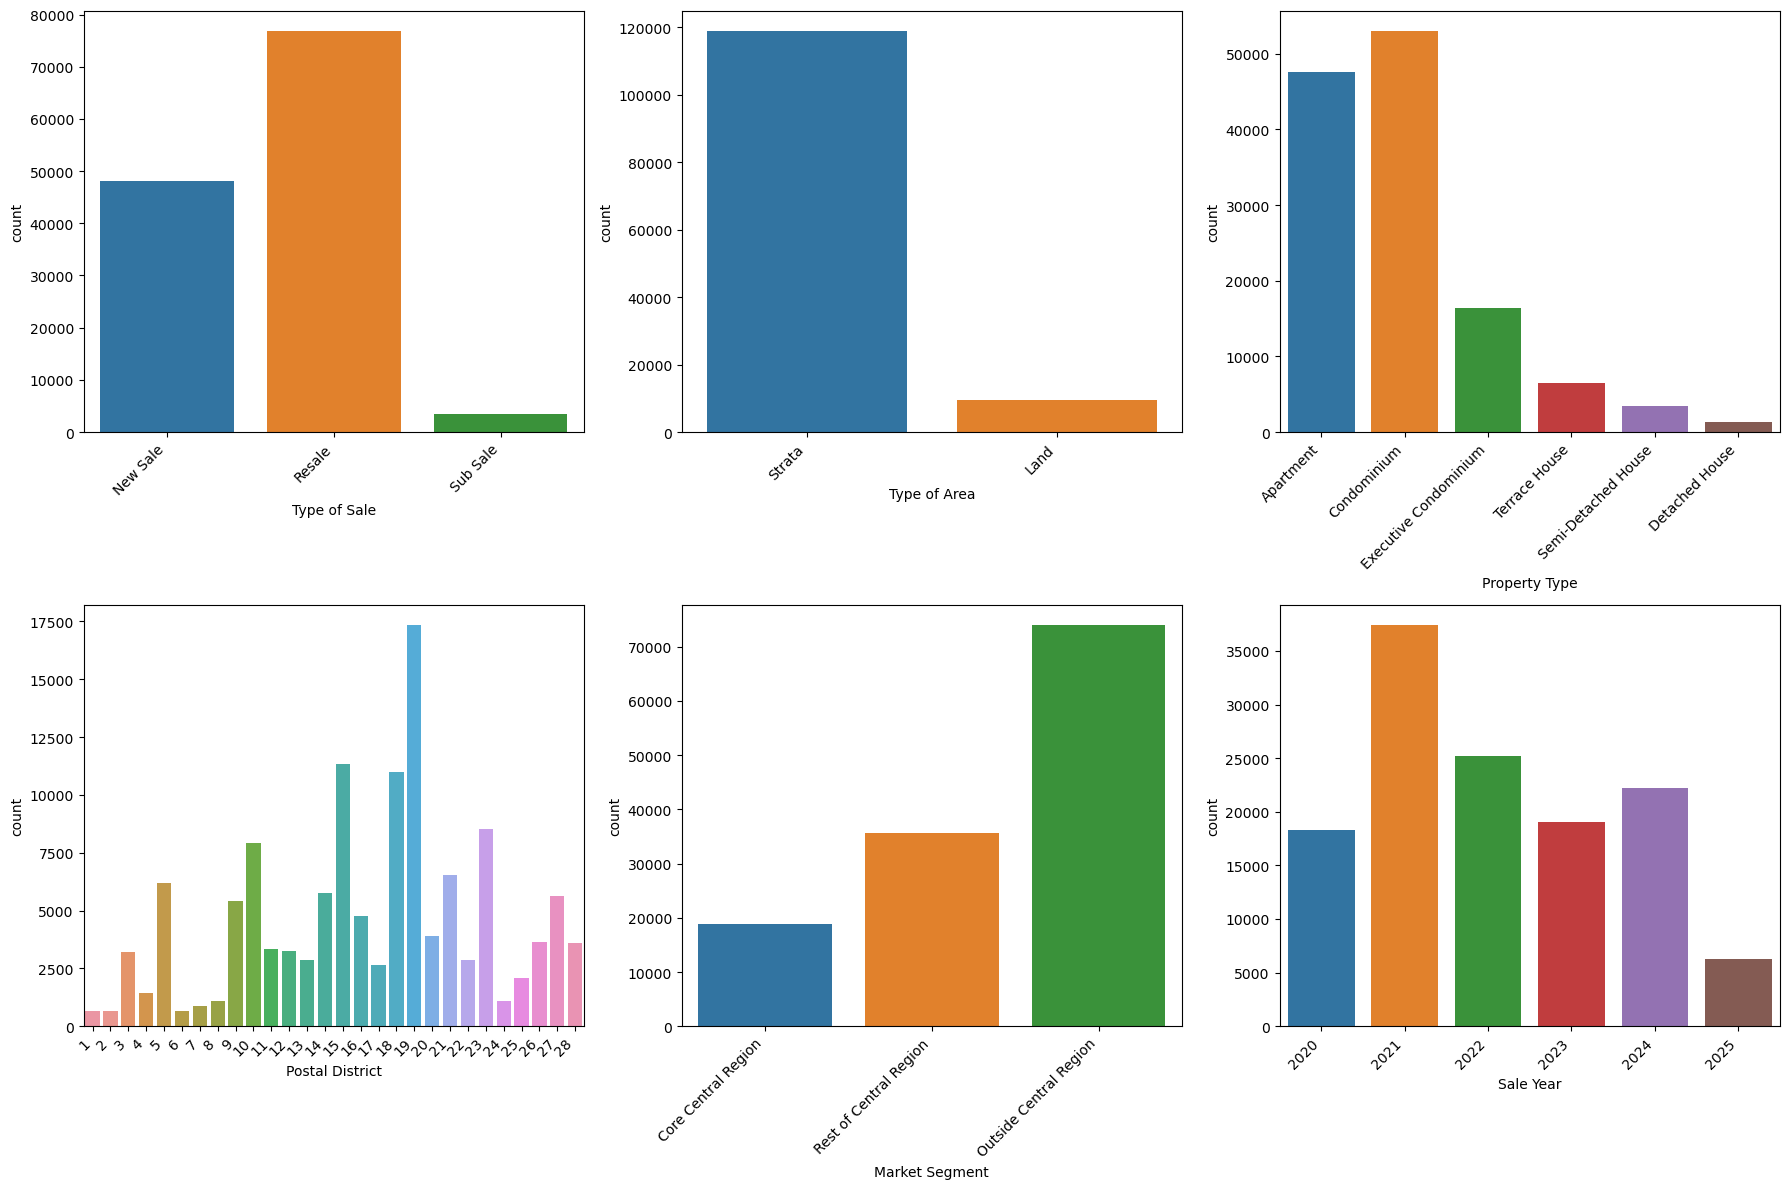

In [82]:
# Extract relevant categorical variables
saletype = pd.DataFrame(df['Type of Sale'])
areatype = pd.DataFrame(df['Type of Area'])
propertytype = pd.DataFrame(df['Property Type'])
postaldistrict = pd.DataFrame(df['Postal District'])
marketsegment = pd.DataFrame(df['Market Segment'])
saleyear = pd.DataFrame(df['Sale Year'])
remainingleaseyears = pd.DataFrame(df['Remaining Lease Years'])

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot count plots for categorical variables
sb.countplot(data=saletype, x='Type of Sale', ax=axes[0, 0])
sb.countplot(data=areatype, x='Type of Area', ax=axes[0, 1])
sb.countplot(data=propertytype, x='Property Type', ax=axes[0, 2])
sb.countplot(data=postaldistrict, x='Postal District', ax=axes[1, 0])
sb.countplot(data=marketsegment, x='Market Segment', ax=axes[1, 1])
sb.countplot(data=saleyear, x='Sale Year', ax=axes[1, 2])

# Rotate x-axis labels for better readability (for variables with many categories)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


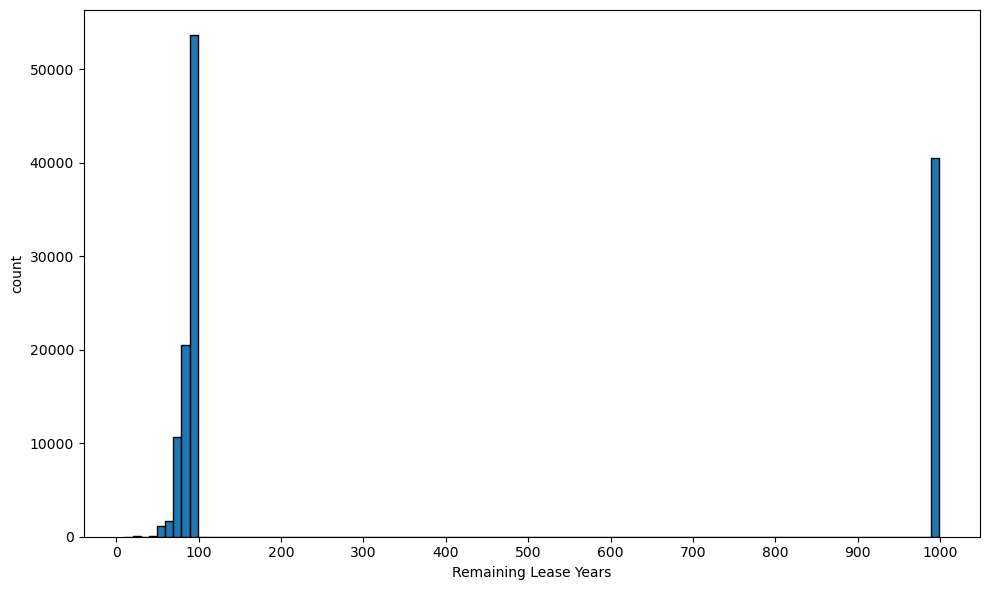

In [83]:
# Histogram/Countplot for Remaining Lease Years
plt.figure(figsize=(10, 6))
plt.hist(df['Remaining Lease Years'], bins=100, edgecolor='black')  # Adjust the number of bins as needed
x_ticks = range(0, int(df['Remaining Lease Years'].max()) + 100, 100)
plt.xticks(x_ticks)
plt.xlabel('Remaining Lease Years')
plt.ylabel('count')

plt.tight_layout()
plt.show()

# Bivariate analysis

Price against Area for different property types

c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

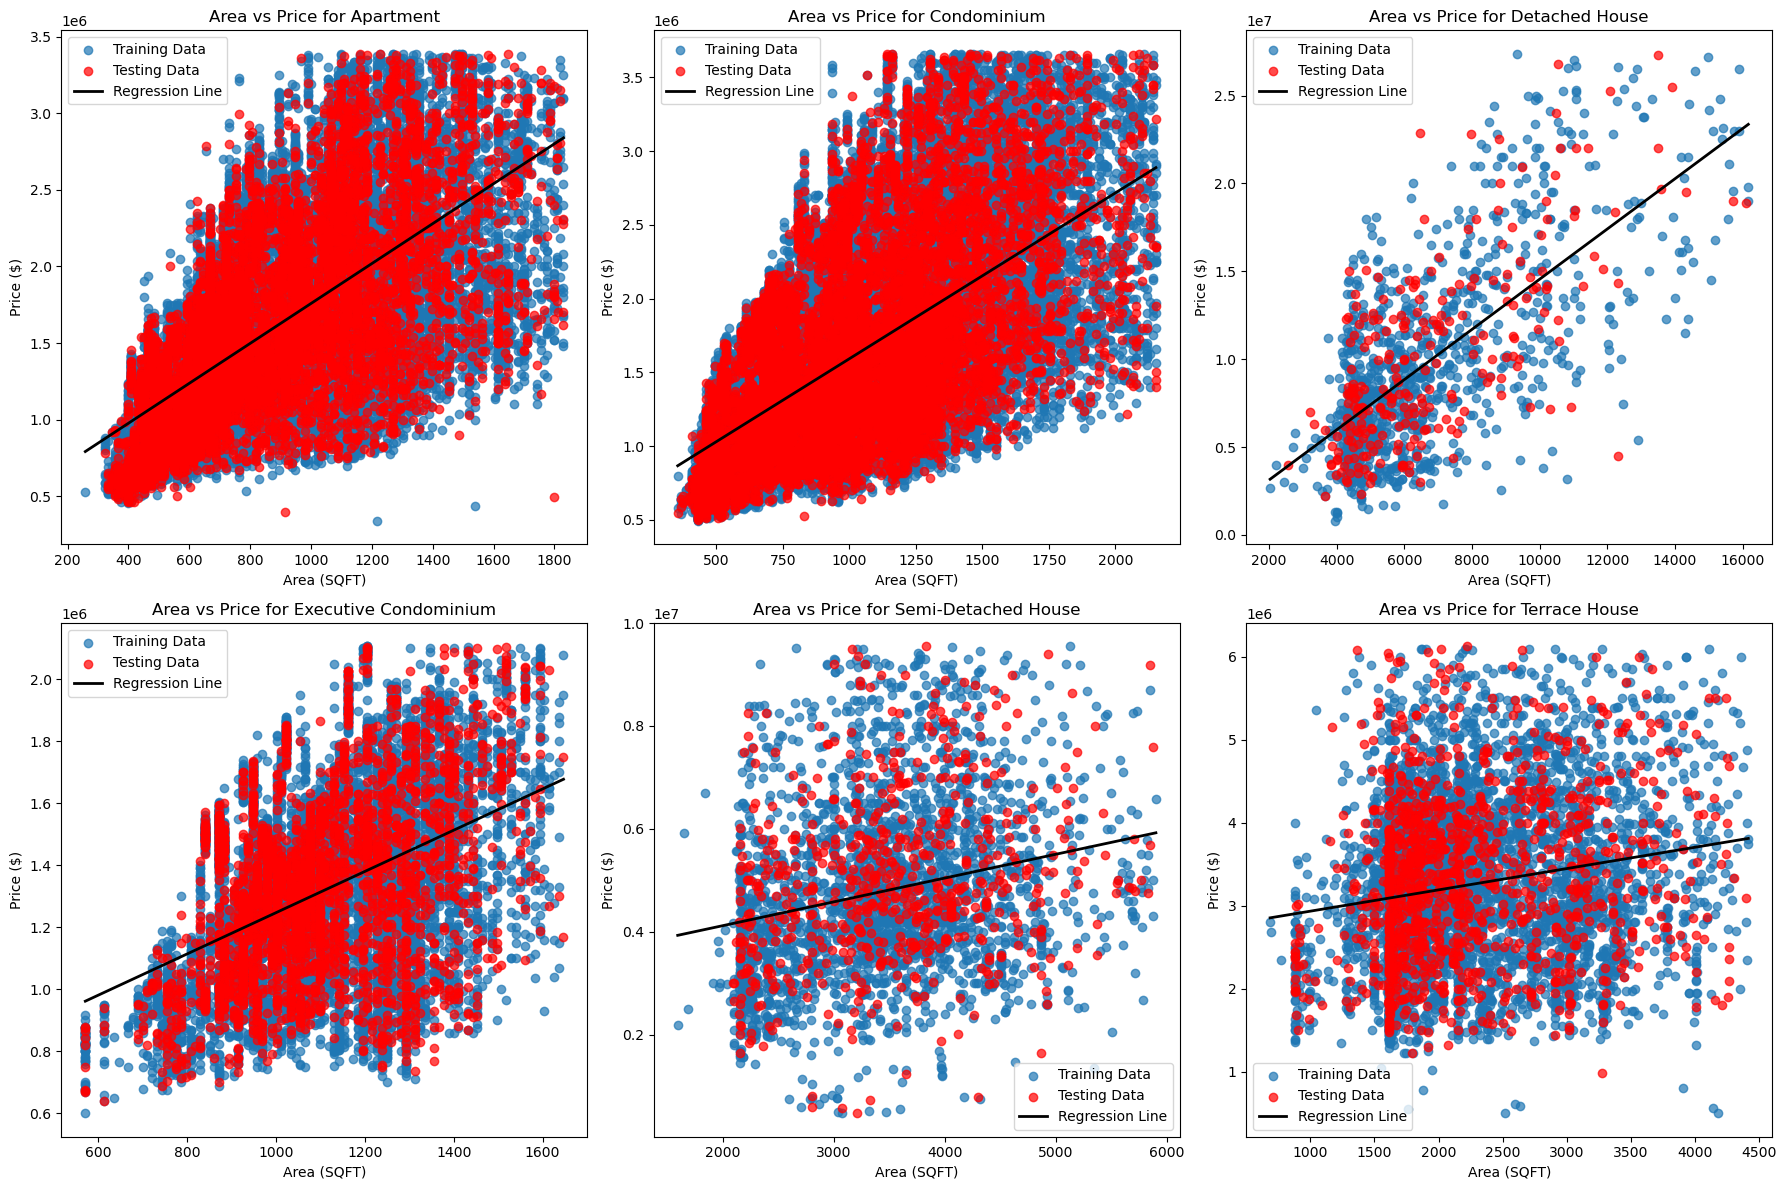


R² Scores for Each Property Type:
Apartment: R² = 0.4465
Condominium: R² = 0.3613
Detached House: R² = 0.4673
Executive Condominium: R² = 0.1943
Semi-Detached House: R² = 0.0501
Terrace House: R² = 0.0325


In [84]:
# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]
r2_scores = {} 
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array

for i, prop_type in enumerate(property_types):
    df1 = df[df['Property Type'] == prop_type].copy()

    # Remove outliers
    df1_filtered = df1.copy()
    df1_filtered['Price'] = removeoutlier(df1_filtered['Price'])
    df1_filtered['Area (SQFT)'] = removeoutlier(df1_filtered['Area (SQFT)'])
    
    # Drop rows with NaN in Area and Price
    df1_filtered = df1_filtered.dropna(subset=['Price', 'Area (SQFT)'])

    # Check if enough data remains after outlier removal
    if df1_filtered.shape[0] == 0:
        print(f"Not enough data for {prop_type} after outlier removal. Using original data.")
        df1_filtered = df1.copy().dropna(subset=['Price', 'Area (SQFT)'])  # Use original data

    # Prepare training data
    area = df1_filtered[['Area (SQFT)']]
    price = df1_filtered[['Price']]

    # Ensure no NaN values remain
    if area.isna().sum().sum() > 0 or price.isna().sum().sum() > 0:
        print(f"Skipping {prop_type} due to NaN values after cleaning.")
        continue

    # Ensure at least 2 rows for train-test split
    if area.shape[0] < 2:
        print(f"Skipping {prop_type} due to insufficient data.")
        continue

    # Train-test split
    area_train, area_test, price_train, price_test = train_test_split(area, price, test_size=0.2, random_state=42)

    # Train Linear Regression model
    linreg = LinearRegression()
    linreg.fit(area_train, price_train)

    r2_score = linreg.score(area_train, price_train)
    r2_scores[prop_type] = r2_score

    # Predictions for regression line
    area_range = np.linspace(area_train.min(), area_train.max(), 100).reshape(-1, 1)
    price_pred = linreg.predict(area_range)

    # Plot scatter and regression line
    ax = axes[i]
    ax.scatter(area_train, price_train, label="Training Data", alpha=0.7)
    ax.scatter(area_test, price_test, color="r", label="Testing Data", alpha=0.7)
    ax.plot(area_range, price_pred, color="black", linewidth=2, label="Regression Line")

    # Set labels and title
    ax.set_xlabel("Area (SQFT)")
    ax.set_ylabel("Price ($)")
    ax.set_title(f"Area vs Price for {prop_type}")
    ax.legend()

plt.tight_layout()
plt.show()


print("\nR² Scores for Each Property Type:")
for prop_type, r2 in r2_scores.items():
    print(f"{prop_type}: R² = {r2:.4f}")

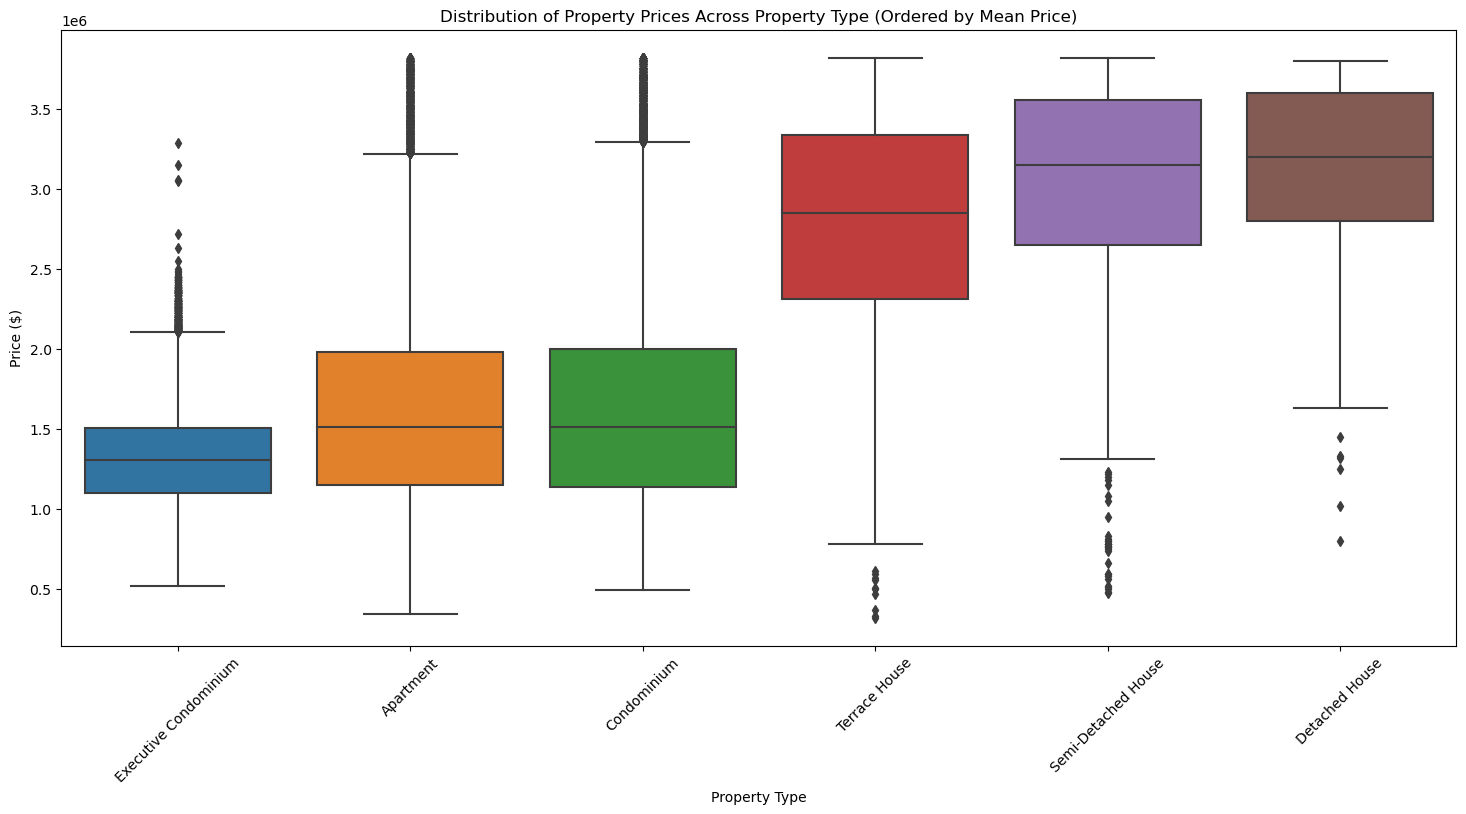

In [88]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Price'] = removeoutlier(df_filtered['Price'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Price', 'Property Type'])

# Convert Postal District to string for categorical plotting
df_filtered['Property Type'] = df_filtered['Property Type'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Property Type")["Price"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Property Type', y='Price', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Property Type")
plt.ylabel("Price ($)")
plt.title("Distribution of Property Prices Across Property Type (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

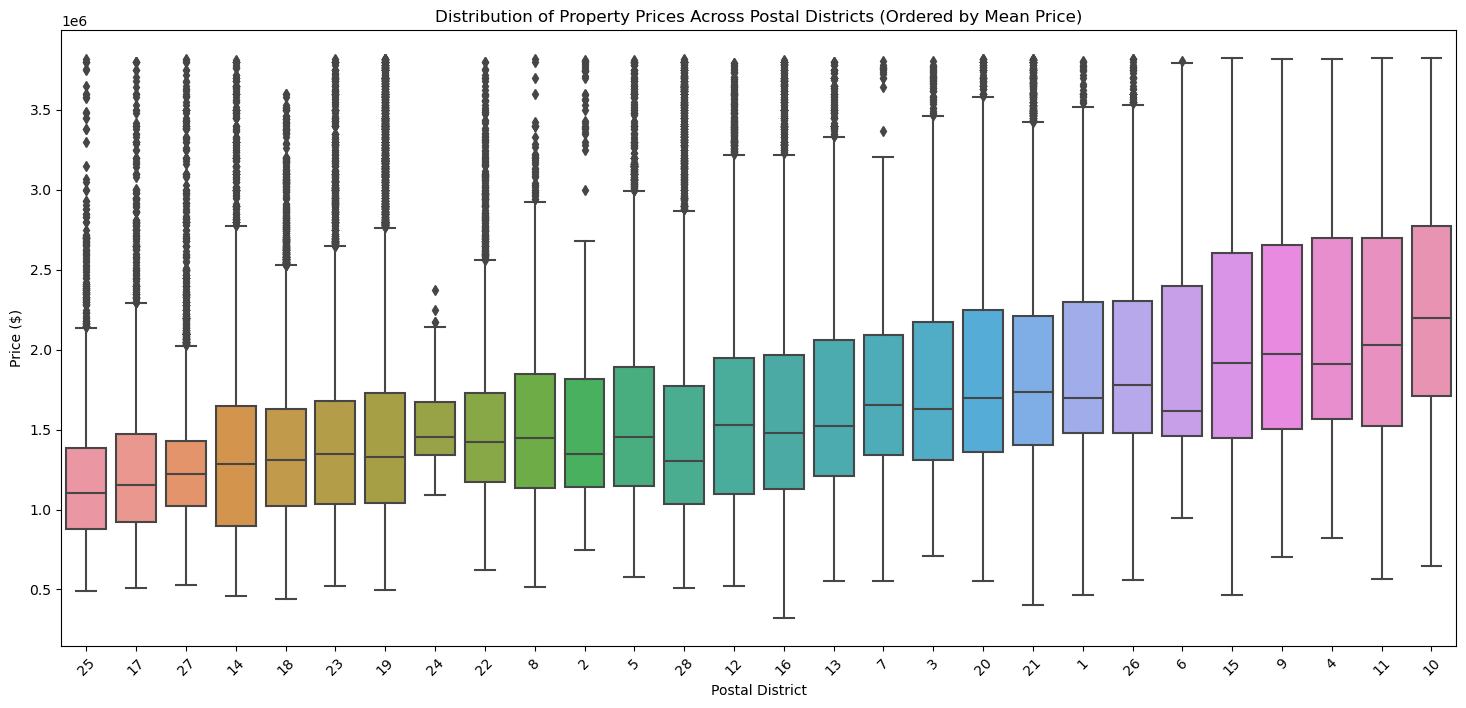

In [85]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Price'] = removeoutlier(df_filtered['Price'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Price', 'Postal District'])

# Convert Postal District to string for categorical plotting
df_filtered['Postal District'] = df_filtered['Postal District'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Postal District")["Price"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Postal District', y='Price', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Postal District")
plt.ylabel("Price ($)")
plt.title("Distribution of Property Prices Across Postal Districts (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


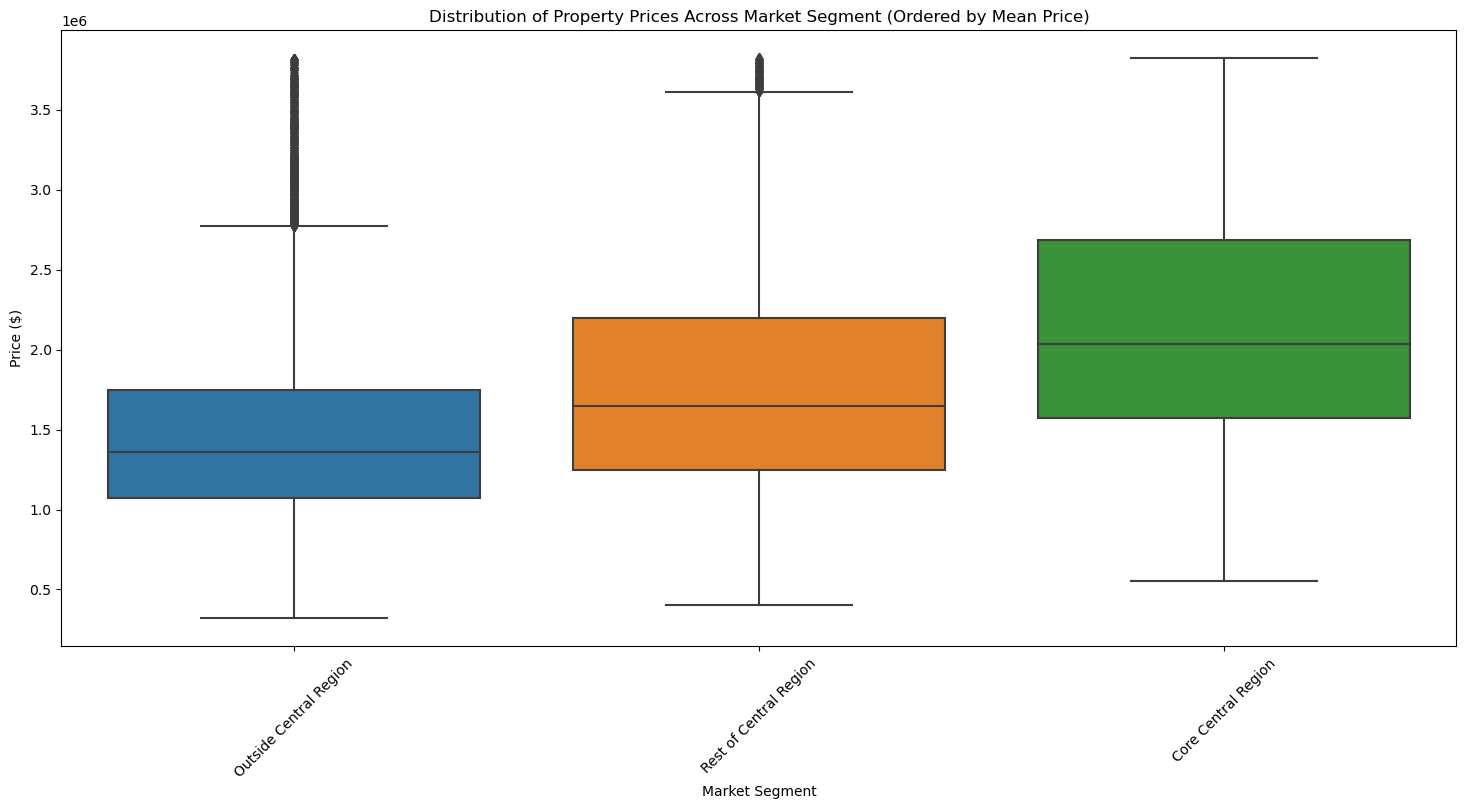

In [87]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Price'] = removeoutlier(df_filtered['Price'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Price', 'Market Segment'])

# Convert Postal District to string for categorical plotting
df_filtered['Market Segment'] = df_filtered['Market Segment'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Market Segment")["Price"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Market Segment', y='Price', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Market Segment")
plt.ylabel("Price ($)")
plt.title("Distribution of Property Prices Across Market Segment (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

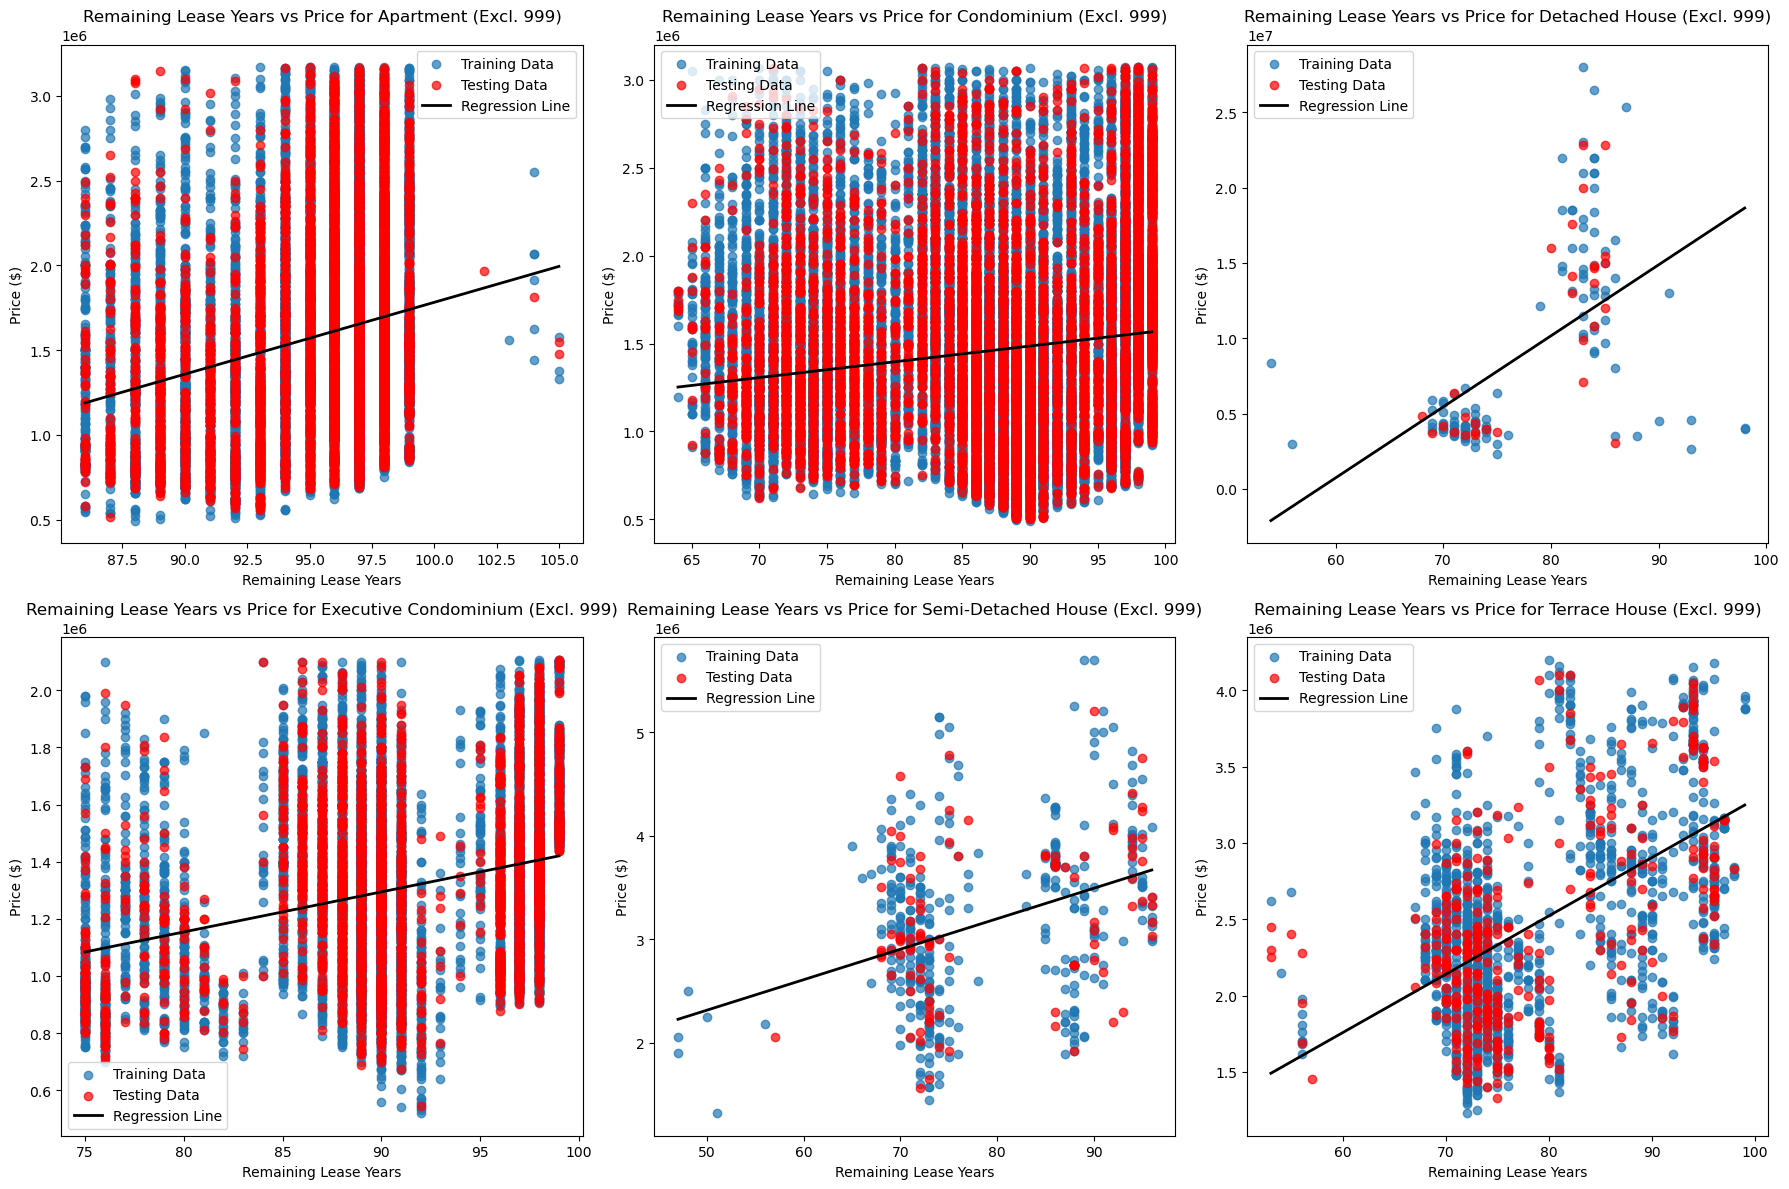


R² Scores for Each Property Type:
Apartment: R² = 0.0476
Condominium: R² = 0.0206
Detached House: R² = 0.3000
Executive Condominium: R² = 0.0849
Semi-Detached House: R² = 0.1257
Terrace House: R² = 0.2827


In [90]:

# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]

r2_scores = {}  # Dictionary to store R² values

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array

for i, prop_type in enumerate(property_types):
    df1 = df[df['Property Type'] == prop_type].copy()

    # Remove rows where 'Remaining Lease Years' is 999
    df1 = df1[df1['Remaining Lease Years'] != 999]

    # Remove outliers
    df1_filtered = df1.copy()
    df1_filtered['Price'] = removeoutlier(df1_filtered['Price'])
    df1_filtered['Remaining Lease Years'] = removeoutlier(df1_filtered['Remaining Lease Years'])
    
    # Drop NaN values
    df1_filtered = df1_filtered.dropna(subset=['Price', 'Remaining Lease Years'])

    # Check if enough data remains after outlier removal
    if df1_filtered.shape[0] == 0:
        print(f"Not enough data for {prop_type} after outlier removal. Using original data.")
        df1_filtered = df1.copy().dropna(subset=['Price', 'Remaining Lease Years'])

    # Prepare training data
    area = df1_filtered[['Remaining Lease Years']]
    price = df1_filtered[['Price']]

    # Ensure no NaN values remain
    if area.isna().sum().sum() > 0 or price.isna().sum().sum() > 0:
        print(f"Skipping {prop_type} due to NaN values after cleaning.")
        continue

    # Ensure at least 2 rows for train-test split
    if area.shape[0] < 2:
        print(f"Skipping {prop_type} due to insufficient data.")
        continue

    # Train-test split
    area_train, area_test, price_train, price_test = train_test_split(area, price, test_size=0.2, random_state=42)

    # Train Linear Regression model
    linreg = LinearRegression()
    linreg.fit(area_train, price_train)

    r2_score = linreg.score(area_train, price_train)
    r2_scores[prop_type] = r2_score

    # Predictions for regression line
    area_range = np.linspace(area_train.min(), area_train.max(), 100).reshape(-1, 1)
    price_pred = linreg.predict(area_range)

    # Plot scatter and regression line
    ax = axes[i]
    ax.scatter(area_train, price_train, label="Training Data", alpha=0.7)
    ax.scatter(area_test, price_test, color="r", label="Testing Data", alpha=0.7)
    ax.plot(area_range, price_pred, color="black", linewidth=2, label="Regression Line")

    # Set labels and title
    ax.set_xlabel("Remaining Lease Years")
    ax.set_ylabel("Price ($)")
    ax.set_title(f"Remaining Lease Years vs Price for {prop_type} (Excl. 999)")
    ax.legend()

plt.tight_layout()
plt.show()

# Print R² scores
print("\nR² Scores for Each Property Type:")
for prop_type, r2 in r2_scores.items():
    print(f"{prop_type}: R² = {r2:.4f}")
